In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [528]:
df = pd.read_csv("BikeSharing_day.csv")

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [530]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [531]:
df.shape

(730, 16)

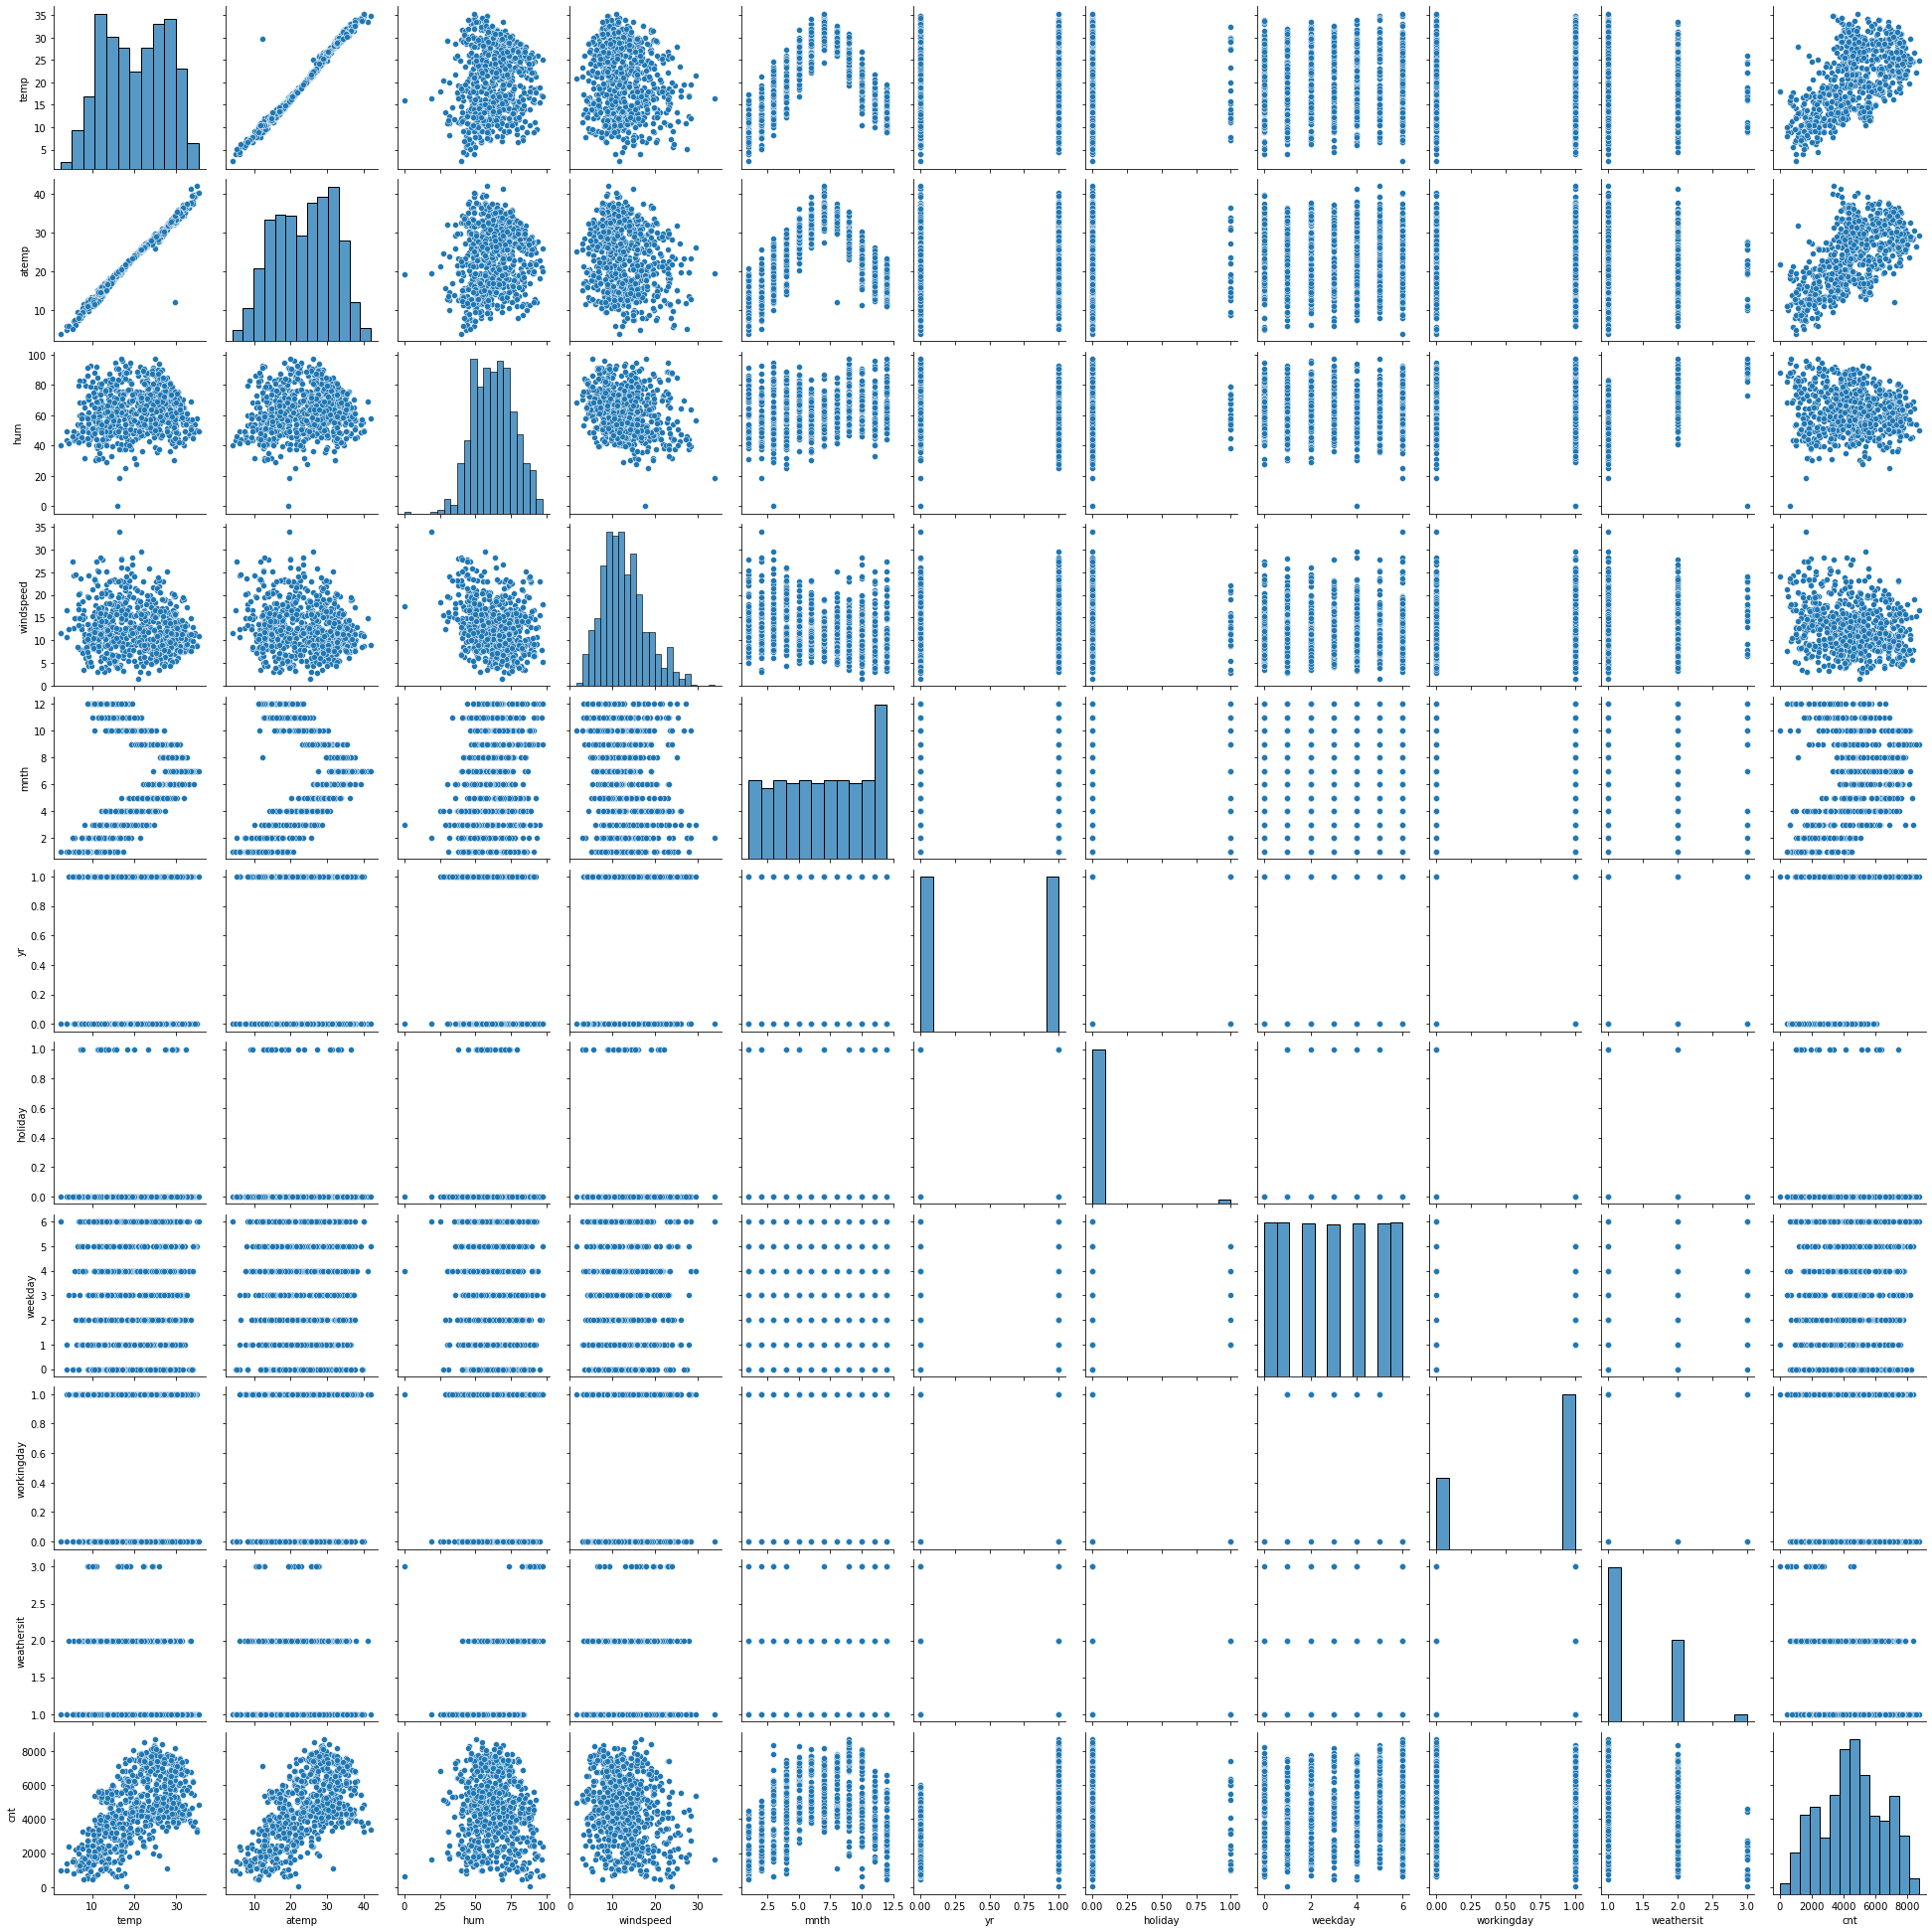

In [532]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed','mnth','yr','holiday','weekday','workingday','weathersit','cnt'])

In [533]:
df.corr()

instant        season            yr          mnth   holiday  \
instant     1.000000  4.135867e-01  8.660262e-01  4.982507e-01  0.016275   
season      0.413587  1.000000e+00 -2.248195e-17  8.310321e-01 -0.010868   
yr          0.866026 -2.248195e-17  1.000000e+00 -2.470170e-17  0.008195   
mnth        0.498251  8.310321e-01 -2.470170e-17  1.000000e+00  0.018905   
holiday     0.016275 -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday    -0.000023 -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday -0.004619  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weathersit -0.021862  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp        0.150738  3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp       0.152773  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
hum         0.016080  2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed  -0.112667 -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257   
casual      0.275604  2.087373e-01  2.505017e-01  1.212079e-01  0.054055   
registered  0.660544  4.103102e-01  5.969106e-01  2.919516e-01 -0.109142   
cnt         0.629896  4.045838e-01  5.697285e-01  2.781909e-01 -0.068764   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant    -0.000023   -0.004619   -0.021862  0.150738  0.152773  0.016080   
season     -0.003081    0.013762    0.021306  0.333361  0.342014  0.208220   
yr         -0.005466   -0.002945   -0.050322  0.048789  0.047215 -0.112547   
mnth        0.009523   -0.004688    0.045613  0.219083  0.226430  0.224937   
holiday    -0.101962   -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   
weekday     1.000000    0.035800    0.031112 -0.000168 -0.007539 -0.052290   
workingday  0.035800    1.000000    0.060236  0.053470  0.052940  0.023202   
weathersit  0.031112    0.060236    1.000000 -0.119503 -0.120559  0.590277   
temp       -0.000168    0.053470   -0.119503  1.000000  0.991696  0.128565   
atemp      -0.007539    0.052940   -0.120559  0.991696  1.000000  0.141512   
hum        -0.052290    0.023202    0.590277  0.128565  0.141512  1.000000   
windspeed   0.014283   -0.018666    0.039769 -0.158186 -0.183876 -0.248506   
casual      0.059978   -0.517607   -0.246044  0.542731  0.543362 -0.075211   
registered  0.057427    0.305437   -0.259025  0.539436  0.543678 -0.089212   
cnt         0.067534    0.062542   -0.295929  0.627044  0.630685 -0.098543   

            windspeed    casual  registered       cnt  
instant     -0.112667  0.275604    0.660544  0.629896  
season      -0.229607  0.208737    0.410310  0.404584  
yr          -0.011624  0.250502    0.596911  0.569728  
mnth        -0.208013  0.121208    0.291952  0.278191  
holiday      0.006257  0.054055   -0.109142 -0.068764  
weekday      0.014283  0.059978    0.057427  0.067534  
workingday  -0.018666 -0.517607    0.305437  0.062542  
weathersit   0.039769 -0.246044   -0.259025 -0.295929  
temp        -0.158186  0.542731    0.539436  0.627044  
atemp       -0.183876  0.543362    0.543678  0.630685  
hum         -0.248506 -0.075211   -0.089212 -0.098543  
windspeed    1.000000 -0.167995   -0.217914 -0.235132  
casual      -0.167995  1.000000    0.394137  0.672123  
registered  -0.217914  0.394137    1.000000  0.945411  
cnt         -0.235132  0.672123    0.945411  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

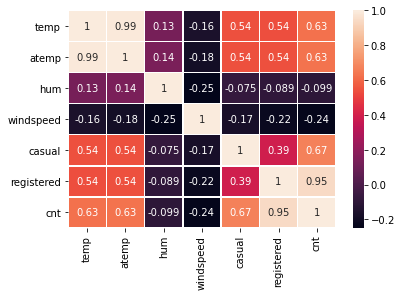

<Figure size 1152x144 with 0 Axes>

In [534]:
sns.heatmap(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(), annot=True, linewidth=0.5)
plt.figure(figsize =(16,2))
plt.show

##### Against temp, casual, registered columns are equaly corelated. Nothing else is looking positive high.
##### windspeed is negatively corelated with all other columns.

- columns to be deleted.
    - instant : not useful
    - dteday : the column already spread amoung multiple detail variable. (yr,month,weekday,working day)
    - weekday : working day mostly will be weekday unless its a holiday, so we covered this variable.
    - casual : contributing to the target variable directly
    - registered : contributing to the target variable directly


In [535]:
df = df.drop(['instant','dteday','casual','registered'], axis = 1)

In [536]:
df.shape

(730, 12)

In [537]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

In [538]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [539]:
bike_master = df.copy()

In [540]:
bike_master['season'] = bike_master['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [541]:
season = pd.get_dummies(bike_master['season'], drop_first = True)

In [542]:
bike_master = pd.concat([bike_master,season], axis =1)
bike_master.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        6           0           2  14.110847   
1  spring   0     1        0        0           0           2  14.902598   
2  spring   0     1        0        1           1           1   8.050924   
3  spring   0     1        0        2           1           1   8.200000   
4  spring   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  spring  summer  winter  
0  18.18125  80.5833  10.749882   985       1       0       0  
1  17.68695  69.6087  16.652113   801       1       0       0  
2   9.47025  43.7273  16.636703  1349       1       0       0  
3  10.60610  59.0435  10.739832  1562       1       0       0  
4  11.46350  43.6957  12.522300  1600       1       0       0

In [543]:
bike_master.drop(['season'], axis=1, inplace=True)
bike_master.head()

yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
0   0     1        0        6           0           2  14.110847  18.18125   
1   0     1        0        0           0           2  14.902598  17.68695   
2   0     1        0        1           1           1   8.050924   9.47025   
3   0     1        0        2           1           1   8.200000  10.60610   
4   0     1        0        3           1           1   9.305237  11.46350   

       hum  windspeed   cnt  spring  summer  winter  
0  80.5833  10.749882   985       1       0       0  
1  69.6087  16.652113   801       1       0       0  
2  43.7273  16.636703  1349       1       0       0  
3  59.0435  10.739832  1562       1       0       0  
4  43.6957  12.522300  1600       1       0       0

### Column weathersit is not having a value 4, the max value is 3. so we can convert it to 0, .5, 1

In [544]:
bike_master['weathersit'] = bike_master['weathersit'].map({1:0,2:0.5,3:1})

In [545]:
bike_master.describe()

yr        mnth     holiday     weekday  workingday  weathersit  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    6.526027    0.028767    2.997260    0.683562    0.197260   
std      0.500343    3.450215    0.167266    2.006161    0.465405    0.272404   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    4.000000    0.000000    1.000000    0.000000    0.000000   
50%      0.500000    7.000000    0.000000    3.000000    1.000000    0.000000   
75%      1.000000   10.000000    0.000000    5.000000    1.000000    0.500000   
max      1.000000   12.000000    1.000000    6.000000    1.000000    1.000000   

             temp       atemp         hum   windspeed          cnt  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620  4508.006849   
std      7.506729    8.150308   14.237589    5.195841  1936.011647   
min      2.424346    3.953480    0.000000    1.500244    22.000000   
25%     13.811885   16.889713   52.000000    9.041650  3169.750000   
50%     20.465826   24.368225   62.625000   12.125325  4548.500000   
75%     26.880615   30.445775   72.989575   15.625589  5966.000000   
max     35.328347   42.044800   97.250000   34.000021  8714.000000   

           spring      summer      winter  
count  730.000000  730.000000  730.000000  
mean     0.246575    0.252055    0.243836  
std      0.431313    0.434490    0.429689  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000

In [546]:
bike_master['mnth'] = bike_master['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep'
                                              ,10:'Oct',11:'Nov',12:'Dec'})

In [547]:
months = pd.get_dummies(bike_master['mnth'], drop_first = True)

In [548]:
months

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0      0    0    0    1     0     0    0    0    0    0    0
1      0    0    0    1     0     0    0    0    0    0    0
2      0    0    0    1     0     0    0    0    0    0    0
3      0    0    0    1     0     0    0    0    0    0    0
4      0    0    0    1     0     0    0    0    0    0    0
..   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725    0    1    0    0     0     0    0    0    0    0    0
726    0    1    0    0     0     0    0    0    0    0    0
727    0    1    0    0     0     0    0    0    0    0    0
728    0    1    0    0     0     0    0    0    0    0    0
729    0    1    0    0     0     0    0    0    0    0    0

[730 rows x 11 columns]

In [549]:
bike_master1 = pd.concat([bike_master, months], axis = 1)
bike_master1.shape

(730, 25)

In [550]:
bike_master1.drop(['mnth'], axis=1, inplace=True)

### 'atemp' feeling temperature in Celsius can be retained and delete temp column

In [551]:
#bike_master1.drop(['atemp'], axis = 1, inplace=True)
bike_master1.head()

yr  holiday  weekday  workingday  weathersit       temp     atemp      hum  \
0   0        0        6           0         0.5  14.110847  18.18125  80.5833   
1   0        0        0           0         0.5  14.902598  17.68695  69.6087   
2   0        0        1           1         0.0   8.050924   9.47025  43.7273   
3   0        0        2           1         0.0   8.200000  10.60610  59.0435   
4   0        0        3           1         0.0   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0  10.749882   985  ...    0    0    1     0     0    0    0    0    0    0  
1  16.652113   801  ...    0    0    1     0     0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    1     0     0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    1     0     0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 24 columns]

In [552]:
bike_master1.describe()

yr     holiday     weekday  workingday  weathersit        temp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    2.997260    0.683562    0.197260   20.319259   
std      0.500343    0.167266    2.006161    0.465405    0.272404    7.506729   
min      0.000000    0.000000    0.000000    0.000000    0.000000    2.424346   
25%      0.000000    0.000000    1.000000    0.000000    0.000000   13.811885   
50%      0.500000    0.000000    3.000000    1.000000    0.000000   20.465826   
75%      1.000000    0.000000    5.000000    1.000000    0.500000   26.880615   
max      1.000000    1.000000    6.000000    1.000000    1.000000   35.328347   

            atemp         hum   windspeed          cnt  ...         Dec  \
count  730.000000  730.000000  730.000000   730.000000  ...  730.000000   
mean    23.726322   62.765175   12.763620  4508.006849  ...    0.084932   
std      8.150308   14.237589    5.195841  1936.011647  ...    0.278971   
min      3.953480    0.000000    1.500244    22.000000  ...    0.000000   
25%     16.889713   52.000000    9.041650  3169.750000  ...    0.000000   
50%     24.368225   62.625000   12.125325  4548.500000  ...    0.000000   
75%     30.445775   72.989575   15.625589  5966.000000  ...    0.000000   
max     42.044800   97.250000   34.000021  8714.000000  ...    1.000000   

              Feb         Jan        July        June         Mar         May  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.076712    0.084932    0.084932    0.082192    0.084932    0.084932   
std      0.266317    0.278971    0.278971    0.274845    0.278971    0.278971   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Nov         Oct         Sep  
count  730.000000  730.000000  730.000000  
mean     0.082192    0.084932    0.082192  
std      0.274845    0.278971    0.274845  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 24 columns]

In [553]:
bike_master1['weekday'] = bike_master1['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike_master1.head()

yr  holiday weekday  workingday  weathersit       temp     atemp      hum  \
0   0        0     Sat           0         0.5  14.110847  18.18125  80.5833   
1   0        0     Sun           0         0.5  14.902598  17.68695  69.6087   
2   0        0     Mon           1         0.0   8.050924   9.47025  43.7273   
3   0        0     Tue           1         0.0   8.200000  10.60610  59.0435   
4   0        0     Wed           1         0.0   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0  10.749882   985  ...    0    0    1     0     0    0    0    0    0    0  
1  16.652113   801  ...    0    0    1     0     0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    1     0     0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    1     0     0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 24 columns]

In [554]:
weekday = pd.get_dummies(bike_master1.weekday, drop_first=True)
weekday

Mon  Sat  Sun  Thu  Tue  Wed
0      0    1    0    0    0    0
1      0    0    1    0    0    0
2      1    0    0    0    0    0
3      0    0    0    0    1    0
4      0    0    0    0    0    1
..   ...  ...  ...  ...  ...  ...
725    0    0    0    1    0    0
726    0    0    0    0    0    0
727    0    1    0    0    0    0
728    0    0    1    0    0    0
729    1    0    0    0    0    0

[730 rows x 6 columns]

In [555]:
bike_master1 = pd.concat([bike_master1, weekday], axis=1)

In [556]:
bike_master1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    object 
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    float64
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  July        730 non-null    uint8  
 18  June        730 non-null    uint8  
 19  Mar         730 non-null    u

In [557]:
bike_master1.drop(['weekday'], axis = 1, inplace=True)

In [558]:
#bike_master1.drop(['temp'], axis=1, inplace=True)

In [559]:
bike_master1.shape

(730, 29)

In [560]:
bike_master1.describe(percentiles=[0.05, 0.10, .25, .5, .75, 0.95, 0.99])

yr     holiday  workingday  weathersit        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562    0.197260   20.319259   23.726322   
std      0.500343    0.167266    0.465405    0.272404    7.506729    8.150308   
min      0.000000    0.000000    0.000000    0.000000    2.424346    3.953480   
5%       0.000000    0.000000    0.000000    0.000000    8.747024   11.030712   
10%      0.000000    0.000000    0.000000    0.000000   10.653165   12.752280   
25%      0.000000    0.000000    0.000000    0.000000   13.811885   16.889713   
50%      0.500000    0.000000    1.000000    0.000000   20.465826   24.368225   
75%      1.000000    0.000000    1.000000    0.500000   26.880615   30.445775   
95%      1.000000    0.000000    1.000000    0.500000   31.520460   35.749975   
99%      1.000000    1.000000    1.000000    1.000000   33.868050   38.941650   
max      1.000000    1.000000    1.000000    1.000000   35.328347   42.044800   

              hum   windspeed          cnt      spring  ...         May  \
count  730.000000  730.000000   730.000000  730.000000  ...  730.000000   
mean    62.765175   12.763620  4508.006849    0.246575  ...    0.084932   
std     14.237589    5.195841  1936.011647    0.431313  ...    0.278971   
min      0.000000    1.500244    22.000000    0.000000  ...    0.000000   
5%      40.741735    5.326052  1330.000000    0.000000  ...    0.000000   
10%     45.000000    6.704754  1742.600000    0.000000  ...    0.000000   
25%     52.000000    9.041650  3169.750000    0.000000  ...    0.000000   
50%     62.625000   12.125325  4548.500000    0.000000  ...    0.000000   
75%     72.989575   15.625589  5966.000000    0.000000  ...    0.000000   
95%     86.868735   22.999988  7576.400000    1.000000  ...    1.000000   
99%     92.795857   27.380948  8163.810000    1.000000  ...    1.000000   
max     97.250000   34.000021  8714.000000    1.000000  ...    1.000000   

              Nov         Oct         Sep         Mon         Sat         Sun  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.084932    0.082192    0.143836    0.143836    0.143836   
std      0.274845    0.278971    0.274845    0.351164    0.351164    0.351164   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
5%       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
10%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
95%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
99%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Thu         Tue         Wed  
count  730.000000  730.000000  730.000000  
mean     0.142466    0.142466    0.141096  
std      0.349767    0.349767    0.348359  
min      0.000000    0.000000    0.000000  
5%       0.000000    0.000000    0.000000  
10%      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
95%      1.000000    1.000000    1.000000  
99%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000  

[12 rows x 29 columns]

### Outliers in Windspeed, so we are reducing it to 99 %

In [561]:
bike_master1 = bike_master1.loc[bike_master1['windspeed'].quantile(.99) >= bike_master1['windspeed']]
bike_master1.shape

(722, 29)

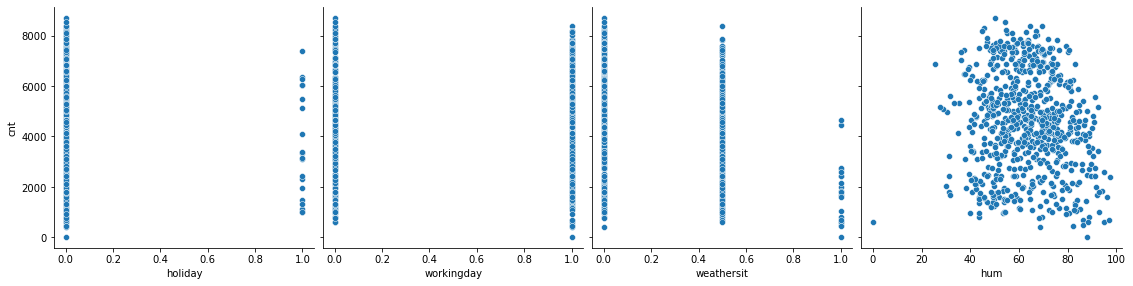

In [562]:
sns.pairplot(bike_master1, x_vars=['holiday','workingday', 'weathersit','hum'], y_vars='cnt',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

### Boxploting the iterative variables to check the outliers.

<AxesSubplot:>

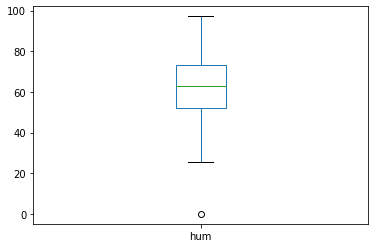

In [563]:
bike_master1[['hum']].plot.box()

<AxesSubplot:>

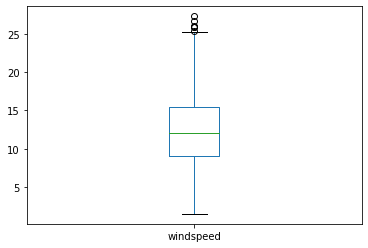

In [564]:
bike_master1[['windspeed']].plot.box()

In [565]:
bike_master1[['spring','summer', 'winter']].sum()/len(bike_master1) * 100

spring    23.961219
summer    25.484765
winter    24.515235
dtype: float64

### fall season also will have a value around this 24-25. so all are likely to be equal

In [566]:
bike_master1[['Dec','Feb','Jan','July','June','Mar','Aug','May','Nov','Oct','Sep']].sum()/len(bike_master1) * 100

Dec     8.587258
Feb     7.202216
Jan     8.448753
July    8.587258
June    8.310249
Mar     8.310249
Aug     8.587258
May     8.587258
Nov     8.310249
Oct     8.448753
Sep     8.310249
dtype: float64

### The number of months also equally spread for the count.

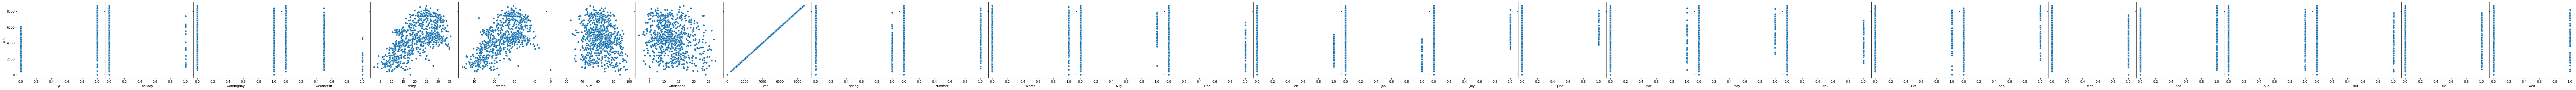

In [567]:
sns.pairplot(bike_master1,x_vars=bike_master1.columns, y_vars='cnt',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

## General info from the above inference
- Year 1:2019 went good than 0:2018
- holiay - holiday will have few days in a year so we could not make any decision on this. ideally non-holiday is performed good
- workingday - looks almost equal, could not make any inference.
- weathersit - (0,.5,1) Clear, Mist, Snow respectively. It is obvious that when there are no weather barrier it performed well 
    than the mist, snow days.
- From business perspective if you see, when the humidity is above 85, there are less in bike renting than other values.
- windspeed could not make any strong inference on it. less than 20 performed well.
- spring performed lesser than summer and winter.


In [568]:
bike_master1.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

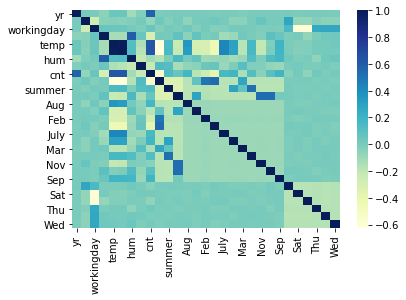

<Figure size 3600x1584 with 0 Axes>

In [569]:
sns.heatmap(bike_master1.corr(), cmap="YlGnBu", annot = False)
plt.figure(figsize=(50,22))
plt.show()

### Spliting the data for Training and Test set

In [570]:
df_train, df_test = train_test_split(bike_master1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scalling the variables

In [571]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()

num_vars = ['hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday  weathersit       temp     atemp       hum  \
728   1        0           0         0.0  10.489153  11.58500  0.497001   
480   1        0           1         0.5  20.431653  24.17915  0.778064   
113   0        0           0         0.5  23.848347  27.58815  0.833761   
581   1        0           0         0.0  31.535847  36.55395  0.670951   
498   1        0           1         0.5  23.506653  27.49500  0.811911   

     windspeed   cnt  spring  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  \
728   0.844971  1796       1  ...    0    0    0    0    0    0    1    0   
480   0.367960  5026       0  ...    0    0    0    0    0    0    0    1   
113   0.410558  4191       0  ...    0    0    0    0    0    0    1    0   
581   0.679694  5464       0  ...    0    0    0    0    0    0    1    0   
498   0.466762  2843       0  ...    1    0    0    0    1    0    0    0   

     Tue  Wed  
728    0    0  
480    0    0  
113    0    0  
581    0    0  
498    0    0  

[5 rows x 29 columns]

## Split x and y sperately

In [572]:
y_train = df_train.pop('cnt')
X_train = df_train

In [573]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [574]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('temp', False, 8),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('Mar', False, 10),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 3),
 ('Sun', False, 5),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12)]

In [575]:
sig_columns = X_train.columns[rfe.support_]
sig_columns

Index(['yr', 'weathersit', 'hum', 'windspeed', 'spring', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'May', 'Nov', 'Sep'],
      dtype='object')

In [576]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 'atemp', 'summer', 'Mar', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Adding the selected columns derived by RFE

In [577]:
X_train_rfe = X_train[sig_columns]

In [578]:
# Adding a constant
X_train_new = sm.add_constant(X_train_rfe)

In [579]:
lm = sm.OLS(y_train, X_train_new).fit()

In [580]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.16e-160
Time:                        21:33:01   Log-Likelihood:                -4140.2
No. Observations:                 505   AIC:                             8312.
Df Residuals:                     489   BIC:                             8380.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4802.1342    281.490     17.060      0.0

In [581]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = True)
vif

Features    VIF
1           yr   1.02
4    windspeed   1.15
15         Sep   1.43
12        June   1.47
8          Dec   1.51
11        July   1.54
7          Aug   1.60
13         May   1.62
14         Nov   1.67
2   weathersit   1.70
3          hum   1.85
9          Feb   1.85
10         Jan   2.01
6       winter   2.97
5       spring   3.89
0        const  50.09

### Residual analysis of the train data

In [582]:
y_train_count = lm.predict(X_train_new)

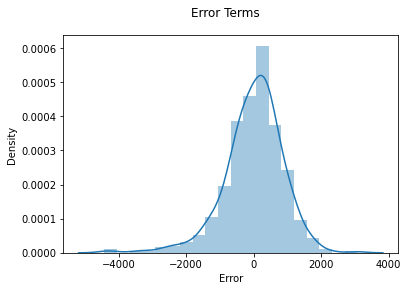

In [583]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins=20)
fig.suptitle("Error Terms")
plt.xlabel("Error")
plt.show()

### Make predictions

In [584]:
number_vars = ['hum', 'windspeed']

In [585]:
df_test[number_vars] = scaler.transform(df_test[number_vars])

### Creating X_test, y_test

In [586]:
#y_test = df_test.pop("cnt")
X_test = df_test

In [587]:
X_test_new = X_test[X_train_rfe.columns]

In [588]:
X_test_new = sm.add_constant(X_test_new)

In [589]:
y_pred = lm.predict(X_test_new)

### Model Evaluation

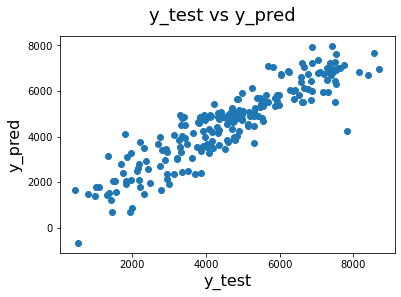

In [590]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred", fontsize=18)
plt.xlabel("y_test", fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## <font color='red'> Requested R square value </font>

In [591]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8210341876192527

In [592]:
X_train_new.head(2)

const  yr  weathersit       hum  windspeed  spring  winter  Aug  Dec  \
728    1.0   1         0.0  0.497001   0.844971       1       0    0    1   
480    1.0   1         0.5  0.778064   0.367960       0       0    0    0   

     Feb  Jan  July  June  May  Nov  Sep  
728    0    0     0     0    0    0    0  
480    0    0     0     0    0    0    0

## Attempt 2

In [593]:
#winter and spring has the highest score in the VIF.
X_train_new2 = X_train_new.drop(['winter','spring'], axis=1)
X_train_new2

const  yr  weathersit       hum  windspeed  Aug  Dec  Feb  Jan  July  \
728    1.0   1         0.0  0.497001   0.844971    0    1    0    0     0   
480    1.0   1         0.5  0.778064   0.367960    0    0    0    0     0   
113    1.0   0         0.5  0.833761   0.410558    0    0    0    0     0   
581    1.0   1         0.0  0.670951   0.679694    1    0    0    0     0   
498    1.0   1         0.5  0.811911   0.466762    0    0    0    0     0   
..     ...  ..         ...       ...        ...  ...  ...  ...  ...   ...   
586    1.0   1         0.5  0.736075   0.538319    1    0    0    0     0   
55     1.0   0         0.5  0.732313   0.833425    0    0    1    0     0   
353    1.0   0         0.5  0.612254   0.052779    0    1    0    0     0   
81     1.0   0         0.5  0.863306   0.525849    0    0    0    0     0   
528    1.0   1         0.0  0.598543   0.824494    0    0    0    0     0   

     June  May  Nov  Sep  
728     0    0    0    0  
480     0    0    0    0  
113     0    0    0    0  
581     0    0    0    0  
498     0    1    0    0  
..    ...  ...  ...  ...  
586     0    0    0    0  
55      0    0    0    0  
353     0    0    0    0  
81      0    0    0    0  
528     1    0    0    0  

[505 rows x 14 columns]

In [594]:
X_train_lm = sm.add_constant(X_train_new2)

In [595]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [596]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.28e-142
Time:                        21:33:05   Log-Likelihood:                -4186.8
No. Observations:                 505   AIC:                             8402.
Df Residuals:                     491   BIC:                             8461.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4632.5039    297.701     15.561      0.0

## Attempt 3

In [597]:
# Nov has the non-zero p value, so checking without this variable.
X_train_new3 = X_train_new.drop(['Nov'], axis=1)
X_train_new3

const  yr  weathersit       hum  windspeed  spring  winter  Aug  Dec  \
728    1.0   1         0.0  0.497001   0.844971       1       0    0    1   
480    1.0   1         0.5  0.778064   0.367960       0       0    0    0   
113    1.0   0         0.5  0.833761   0.410558       0       0    0    0   
581    1.0   1         0.0  0.670951   0.679694       0       0    1    0   
498    1.0   1         0.5  0.811911   0.466762       0       0    0    0   
..     ...  ..         ...       ...        ...     ...     ...  ...  ...   
586    1.0   1         0.5  0.736075   0.538319       0       0    1    0   
55     1.0   0         0.5  0.732313   0.833425       1       0    0    0   
353    1.0   0         0.5  0.612254   0.052779       0       1    0    1   
81     1.0   0         0.5  0.863306   0.525849       0       0    0    0   
528    1.0   1         0.0  0.598543   0.824494       0       0    0    0   

     Feb  Jan  July  June  May  Sep  
728    0    0     0     0    0    0  
480    0    0     0     0    0    0  
113    0    0     0     0    0    0  
581    0    0     0     0    0    0  
498    0    0     0     0    1    0  
..   ...  ...   ...   ...  ...  ...  
586    0    0     0     0    0    0  
55     1    0     0     0    0    0  
353    0    0     0     0    0    0  
81     0    0     0     0    0    0  
528    0    0     0     1    0    0  

[505 rows x 15 columns]

In [598]:
X_train_lm3 = sm.add_constant(X_train_new3)

In [599]:
lm = sm.OLS(y_train, X_train_lm3).fit()

In [600]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.44e-152
Time:                        21:33:06   Log-Likelihood:                -4160.5
No. Observations:                 505   AIC:                             8351.
Df Residuals:                     490   BIC:                             8414.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4661.0156    291.877     15.969      0.0

In [601]:
vif_3 = pd.DataFrame()
vif_3['Features'] = X_train_lm3.columns
vif_3['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by='VIF', ascending = True)
vif_3

Features    VIF
1           yr   1.02
4    windspeed   1.15
8          Dec   1.30
14         Sep   1.41
12        June   1.47
11        July   1.54
7          Aug   1.60
13         May   1.62
2   weathersit   1.69
9          Feb   1.83
3          hum   1.85
10         Jan   1.98
6       winter   2.30
5       spring   3.86
0        const  49.78

In [602]:
#number_vars = ['hum', 'windspeed']

In [603]:
df_test[number_vars] = scaler.transform(df_test[number_vars])

### Creating X_test, y_test

In [604]:
#y_test = df_test.pop("cnt")
X_test3 = df_test
X_train_new3.pop('const')

728    1.0
480    1.0
113    1.0
581    1.0
498    1.0
      ... 
586    1.0
55     1.0
353    1.0
81     1.0
528    1.0
Name: const, Length: 505, dtype: float64

In [605]:
X_test_new3 = X_test3[X_train_new3.columns]

In [606]:
X_test_new3 = sm.add_constant(X_test_new3)

In [607]:
y_pred3 = lm.predict(X_test_new3)

In [608]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.5292847080539886

## Model 1 is the best amoung these all

#### <font color='blue'> Got an idea of creating a function for these and remove the columns an run the function to print the lr summary and R square value each time. There were no marks for that and due to time limitation, could not make in that process</font>